<a href="https://colab.research.google.com/github/RoaaM/SemEval_competion/blob/main/Task_C(categorical_classification_11_classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import ktrain
from ktrain import text

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/train_all_tasks.csv')
df = df[['text', 'label_vector']]
df.head()

,text,label_vector
0,"Damn, this writing was pretty chaotic",none
1,"Yeah, and apparently a bunch of misogynistic v...",none
2,How the FUCK is this woman still an MP!!!???,none
3,Understand. Know you're right. At same time I ...,none
4,Surprized they didn't stop and rape some women,none


In [ ]:
df['label_vector'].value_counts()

none                                                               10602
2.1 descriptive attacks                                              717
2.2 aggressive and emotive attacks                                   673
3.1 casual use of gendered slurs, profanities, and insults           637
3.2 immutable gender differences and gender stereotypes              417
4.2 supporting systemic discrimination against women as a group      258
1.2 incitement and encouragement of harm                             254
2.3 dehumanising attacks & overt sexual objectification              200
4.1 supporting mistreatment of individual women                       75
3.3 backhanded gendered compliments                                   64
1.1 threats of harm                                                   56
3.4 condescending explanations or unwelcome advice                    47
Name: label_vector, dtype: int64

In [ ]:
df['label_vector'].unique()

array(['none', '2.3 dehumanising attacks & overt sexual objectification',
       '2.1 descriptive attacks',
       '1.2 incitement and encouragement of harm',
       '3.1 casual use of gendered slurs, profanities, and insults',
       '4.2 supporting systemic discrimination against women as a group',
       '2.2 aggressive and emotive attacks',
       '3.2 immutable gender differences and gender stereotypes',
       '3.4 condescending explanations or unwelcome advice',
       '3.3 backhanded gendered compliments',
       '4.1 supporting mistreatment of individual women',
       '1.1 threats of harm'], dtype=object)

In [ ]:
df['label_vector'] = df['label_vector'].map({ '2.3 dehumanising attacks & overt sexual objectification':0,
                                              '2.1 descriptive attacks':1,
                                              '1.2 incitement and encouragement of harm':2,
                                              '3.1 casual use of gendered slurs, profanities, and insults':3,
                                              '4.2 supporting systemic discrimination against women as a group':4,
                                              '2.2 aggressive and emotive attacks':5,
                                              '3.2 immutable gender differences and gender stereotypes':6,
                                              '3.4 condescending explanations or unwelcome advice':7,
                                              '3.3 backhanded gendered compliments':8,
                                              '4.1 supporting mistreatment of individual women':9,
                                              '1.1 threats of harm':10})

In [ ]:
df['label_vector'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df['label_vector'] = df['label_vector'].astype(int)

In [ ]:
df['label_vector'].value_counts()

1     717
5     673
3     637
6     417
4     258
2     254
0     200
9      75
8      64
10     56
7      47
Name: label_vector, dtype: int64

In [ ]:
df.shape

(3398, 2)

In [ ]:
X = df['text'].tolist()
y = df['label_vector'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_array(x_train = X_train,
                                                                      y_train = y_train,
                                                                      x_test = X_test,
                                                                      y_test = y_test,
                                                                      class_names = ['0','1','2','3','4','5','6','7','8','9','10'],
                                                                      preprocess_mode = 'bert',
                                                                      # preprocess_mode='standard',
                                                                      ngram_range = 1,
                                                                      maxlen = 350) # bert

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
# text.print_text_classifiers()

In [ ]:
# model = text.text_classifier('nbsvm', (X_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 300
building document-term matrix... this may take a few moments...
rows: 1-3058
computing log-count ratios...
done.


In [ ]:
# learner = ktrain.get_learner(model, train_data=(X_train, y_train))

In [ ]:
# learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
96/96 [==============================] - 1s 5ms/step - loss: 2.3963 - accuracy: 0.0870
Epoch 2/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3963 - accuracy: 0.0870
Epoch 3/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3961 - accuracy: 0.0870
Epoch 4/1024
96/96 [==============================] - 0s 4ms/step - loss: 2.3958 - accuracy: 0.0883
Epoch 5/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3949 - accuracy: 0.0906
Epoch 6/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3927 - accuracy: 0.0978
Epoch 7/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3868 - accuracy: 0.1174
Epoch 8/1024
96/96 [==============================] - 0s 5ms/step - loss: 2.3719 - accuracy: 0.1815
Epoch 9/1024
96/96 [==============================] - 0s 4ms/step - loss: 2.3346 - accuracy: 0.3035
Epoch 10/1024
96/

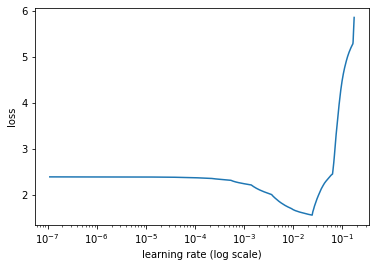

In [ ]:
# learner.lr_plot()

In [ ]:
# learner.fit(0.001, 3, cycle_len=1, cycle_mult=2)

Epoch 1/7
96/96 [==============================] - 1s 5ms/step - loss: 2.3414 - accuracy: 0.3120
Epoch 2/7
96/96 [==============================] - 0s 5ms/step - loss: 2.2112 - accuracy: 0.4781
Epoch 3/7
96/96 [==============================] - 0s 5ms/step - loss: 2.0752 - accuracy: 0.5455
Epoch 4/7
96/96 [==============================] - 0s 5ms/step - loss: 1.9995 - accuracy: 0.5716
Epoch 5/7
96/96 [==============================] - 0s 4ms/step - loss: 1.8475 - accuracy: 0.6226
Epoch 6/7
96/96 [==============================] - 0s 5ms/step - loss: 1.7628 - accuracy: 0.6527
Epoch 7/7
96/96 [==============================] - 0s 4ms/step - loss: 1.7324 - accuracy: 0.6684


In [ ]:
# MODEL_NAME = 'bert-base-uncased'
# t = text.Transformer(MODEL_NAME, maxlen=500,
#                      classes=['0','1','2','3','4','5','6','7','8','9','10'])
# trn = t.preprocess_train(X_train, y_train)
# val = t.preprocess_test(X_test, y_test)
# model = t.get_classifier()
# learner = ktrain.get_learner(model, train_data=trn, batch_size=6)
# learner.fit_onecycle(3e-5, 1)

/usr/local/lib/python3.8/dist-packages/ktrain/text/preprocessor.py:383: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 25
	95percentile : 44
	99percentile : 48


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 25
	95percentile : 44
	99percentile : 48




begin training using onecycle policy with max lr of 3e-05...
510/510 [==============================] - 389s 726ms/step - loss: 1.8496 - accuracy: 0.3388


In [ ]:
# define the classifier
model = text.text_classifier('bert',
                              train_data = (X_train, y_train),
                              preproc = preproc)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
learner = ktrain.get_learner(model,
                             train_data = (X_train, y_train),
                             batch_size = 6)

In [ ]:
history = learner.fit_onecycle(1e-4, 6)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/6
510/510 [==============================] - 283s 515ms/step - loss: 1.8861 - accuracy: 0.3172
Epoch 2/6
510/510 [==============================] - 262s 515ms/step - loss: 1.4202 - accuracy: 0.4941
Epoch 3/6
510/510 [==============================] - 262s 515ms/step - loss: 1.1288 - accuracy: 0.6105
Epoch 4/6
510/510 [==============================] - 262s 515ms/step - loss: 0.7788 - accuracy: 0.7305
Epoch 5/6
510/510 [==============================] - 262s 514ms/step - loss: 0.2388 - accuracy: 0.9186
Epoch 6/6
510/510 [==============================] - 262s 514ms/step - loss: 0.0395 - accuracy: 0.9912


In [ ]:
learner.validate(val_data = (X_test, y_test))

11/11 [==============================] - 13s 839ms/step
              precision    recall  f1-score   support

           0       0.60      0.39      0.47        23
           1       0.41      0.58      0.48        69
           2       0.61      0.63      0.62        30
           3       0.59      0.60      0.60        58
           4       0.42      0.53      0.47        15
           5       0.58      0.55      0.57        74
           6       0.47      0.35      0.40        46
           7       0.00      0.00      0.00         5
           8       0.75      0.38      0.50         8
           9       0.50      0.43      0.46         7
          10       0.00      0.00      0.00         5

    accuracy                           0.51       340
   macro avg       0.45      0.40      0.42       340
weighted avg       0.51      0.51      0.51       340



array([[ 9,  7,  2,  3,  0,  0,  1,  0,  1,  0,  0],
       [ 3, 40,  1,  3,  5,  6, 10,  1,  0,  0,  0],
       [ 1,  1, 19,  1,  1,  4,  1,  0,  0,  2,  0],
       [ 0,  3,  1, 35,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  8,  0,  3,  0,  0,  0,  0],
       [ 1, 14,  3, 13,  1, 41,  0,  1,  0,  0,  0],
       [ 0, 21,  2,  2,  3,  0, 16,  0,  0,  1,  1],
       [ 0,  4,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  1,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  1,  0,  0,  3,  0],
       [ 1,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0]])

##development phase

In [ ]:
# now make predict on test file
test = pd.read_csv('/content/dev_task_c_entries.csv')
predictor = ktrain.get_predictor(learner.model, preproc)
test_result=pd.Series(predictor.predict(test_) for test_ in test['text'])

1/1 [==============================] - 0s 48ms/step


In [ ]:
label = test_result.map({'0':'2.3 dehumanising attacks & overt sexual objectification',
                         '1':'2.1 descriptive attacks',
                         '2':'1.2 incitement and encouragement of harm',
                         '3':'3.1 casual use of gendered slurs, profanities, and insults',
                         '4':'4.2 supporting systemic discrimination against women as a group',
                         '5':'2.2 aggressive and emotive attacks',
                         '6':'3.2 immutable gender differences and gender stereotypes',
                         '7':'3.4 condescending explanations or unwelcome advice',
                         '8':'3.3 backhanded gendered compliments',
                         '9':'4.1 supporting mistreatment of individual women',
                         '10':'1.1 threats of harm'})

In [ ]:
test_csv= pd.DataFrame({'rewire_id':test['rewire_id'], 'label_pred':label})
test_csv.head()

,rewire_id,label_pred
0,sexism2022_english-739,2.1 descriptive attacks
1,sexism2022_english-10787,2.2 aggressive and emotive attacks
2,sexism2022_english-18547,2.1 descriptive attacks
3,sexism2022_english-6425,1.2 incitement and encouragement of harm
4,sexism2022_english-10001,2.2 aggressive and emotive attacks


In [ ]:
test_csv['label_pred'].value_counts()

2.1 descriptive attacks                                            133
2.2 aggressive and emotive attacks                                 107
3.1 casual use of gendered slurs, profanities, and insults          86
3.2 immutable gender differences and gender stereotypes             47
1.2 incitement and encouragement of harm                            42
4.2 supporting systemic discrimination against women as a group     27
2.3 dehumanising attacks & overt sexual objectification             15
4.1 supporting mistreatment of individual women                     15
1.1 threats of harm                                                  6
3.3 backhanded gendered compliments                                  4
3.4 condescending explanations or unwelcome advice                   4
Name: label_pred, dtype: int64

In [ ]:
test_csv.to_csv('TESTING_RESULT_TASK_C.csv', index=False)

##test phase


In [ ]:
test_phase = pd.read_csv('/content/test_task_c_entries.csv')
predictor = ktrain.get_predictor(learner.model, preproc)
test_result=pd.Series(predictor.predict(test_) for test_ in test_phase['text'])

1/1 [==============================] - 0s 50ms/step


In [ ]:
label = test_result.map({'0':'2.3 dehumanising attacks & overt sexual objectification',
                         '1':'2.1 descriptive attacks',
                         '2':'1.2 incitement and encouragement of harm',
                         '3':'3.1 casual use of gendered slurs, profanities, and insults',
                         '4':'4.2 supporting systemic discrimination against women as a group',
                         '5':'2.2 aggressive and emotive attacks',
                         '6':'3.2 immutable gender differences and gender stereotypes',
                         '7':'3.4 condescending explanations or unwelcome advice',
                         '8':'3.3 backhanded gendered compliments',
                         '9':'4.1 supporting mistreatment of individual women',
                         '10':'1.1 threats of harm'})

In [ ]:
test_csv= pd.DataFrame({'rewire_id':test_phase['rewire_id'], 'label_pred':label})
test_csv.head()

,rewire_id,label_pred
0,sexism2022_english-10731,3.2 immutable gender differences and gender st...
1,sexism2022_english-7356,2.1 descriptive attacks
2,sexism2022_english-13064,1.2 incitement and encouragement of harm
3,sexism2022_english-17039,3.2 immutable gender differences and gender st...
4,sexism2022_english-14482,2.1 descriptive attacks


In [ ]:
test_csv['label_pred'].value_counts()

2.1 descriptive attacks                                            270
2.2 aggressive and emotive attacks                                 195
3.1 casual use of gendered slurs, profanities, and insults         169
3.2 immutable gender differences and gender stereotypes            120
4.2 supporting systemic discrimination against women as a group     75
1.2 incitement and encouragement of harm                            55
2.3 dehumanising attacks & overt sexual objectification             44
4.1 supporting mistreatment of individual women                     15
3.4 condescending explanations or unwelcome advice                  12
3.3 backhanded gendered compliments                                  8
1.1 threats of harm                                                  7
Name: label_pred, dtype: int64

In [ ]:
test_csv.to_csv('TESTING_PHASE.csv', index=False)

#ML model


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['label_vector'], test_size=0.2, stratify=df['label_vector'])

In [ ]:
tfidf_vect = TfidfVectorizer(decode_error = 'ignore')
vectors_train = tfidf_vect.fit_transform(X_train.values.astype('U')).todense()
vectors_test = tfidf_vect.transform(X_test.values.astype('U')).todense()

In [ ]:
print("n_samples: %d, n_features: %d" % vectors_train.shape)

n_samples: 2718, n_features: 8034


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
model, predictions = clf.fit(vectors_train, vectors_test, Y_train, Y_test)

100%|██████████| 29/29 [13:39<00:00, 28.24s/it]


In [ ]:
model
# without preprocessing and tuning highest f1 score is 0.37 from XGBClassifier

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.40,0.25,None,0.37,404.14
LGBMClassifier,0.38,0.23,None,0.36,16.67
ExtraTreesClassifier,0.41,0.22,None,0.35,19.83
BaggingClassifier,0.37,0.22,None,0.34,8.99
AdaBoostClassifier,0.33,0.21,None,0.26,18.19
Perceptron,0.30,0.21,None,0.30,4.77
RandomForestClassifier,0.38,0.20,None,0.32,6.03
PassiveAggressiveClassifier,0.29,0.20,None,0.29,15.65
SGDClassifier,0.35,0.20,None,0.32,18.25


###tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Remove Stopwords
# i will keep stopwords in bert
stop_words = stopwords.words('english')
def remove_stopwords(text):
  return " ".join([word for word in text.split(" ") if word not in stop_words])


# Remove Punctuations Marks
punctuation_marks = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^`{|}~،؟…«“\":\"…”]""")
def remove_punch_marks(text):
  return punctuation_marks.sub(repl="", string=text)



# Remove Numbers
numbers = re.compile('\d+')
def remove_numbers(text):
  return numbers.sub(repl="", string=text)


# Remove Multible whitespace
multiple_whitespace = re.compile('\s{2,}')
def remove_whitespace(text):
  return multiple_whitespace.sub(repl=" ", string=text)


# remove repeating characters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)


def clean_all(text):
  text = text.lower().strip()
  text = remove_whitespace(text)
  text = remove_punch_marks(text)
  text = remove_numbers(text)
  text = remove_stopwords(text)
  text = remove_repeating_char(text)
  return text

In [ ]:
clean_text = []
for text in df['text']:
  new = clean_all(text)
  clean_text.append(new)

clean_dataset = pd.DataFrame({'text':clean_text, 'label_vector':df['label_vector']})

In [ ]:
X = clean_dataset['text']
y = clean_dataset['label_vector']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3058,), (340,), (3058,), (340,))

In [ ]:
# tf-idf
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
def randomized_search(model, parameters):
    # Use f1_weighted as scoring since we already know that the dataset has imbalance labels
    random = RandomizedSearchCV(model, parameters, cv=5, scoring='f1_macro')
    random.fit(X_train, y_train)
    print()
    print('Best Score : ',random.best_score_)
    print('Best parameters : ')
    print(random.best_params_)

In [ ]:
from xgboost import XGBClassifier


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
xgb = XGBClassifier(class_weight='balanced')
xgb_param = {'C':[0.001, 0.01, 0.1, 1, 10],
             'kernel':['linear','poly','rbf','sigmoid'],
             'booster':['gbtree', 'gblinear', 'dart'],
             'max_depth':[3, 4, 5],
             'sampling_method':['uniform', 'gradient_based'],
             'lambda':[1,2],
             'alpha':[0,1],
             'tree_method':['auto', 'exact', 'approx', 'hist', 'gpu_hist']
              }
randomized_search(xgb, xgb_param)


Best Score :  0.21974165593051995
Best parameters : 
{'tree_method': 'exact', 'sampling_method': 'gradient_based', 'max_depth': 5, 'lambda': 1, 'kernel': 'poly', 'booster': 'gbtree', 'alpha': 0, 'C': 1}


In [ ]:
xgb_model = XGBClassifier(C=10,tree_method='auto',
                          sampling_method='gradient_based', max_depth=5,
                          kernel='poly', booster='gbtree')
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.33      0.16      0.21        19
           1       0.44      0.69      0.53        80
           2       0.31      0.25      0.28        16
           3       0.51      0.62      0.56        71
           4       0.40      0.13      0.20        30
           5       0.42      0.42      0.42        60
           6       0.24      0.20      0.22        41
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.50      0.17      0.25         6
          10       0.00      0.00      0.00         5

    accuracy                           0.42       340
   macro avg       0.29      0.24      0.24       340
weighted avg       0.39      0.42      0.39       340



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc_param = {'C':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto']}
randomized_search(svc, svc_param)


Best Score :  0.2273916279861822
Best parameters : 
{'kernel': 'linear', 'gamma': 'scale', 'C': 10}


In [ ]:
SVC_model = SVC(class_weight='balanced',C=10,gamma='scale',kernel='linear')
SVC_model.fit(X_train, y_train)
pred = SVC_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.16      0.16      0.16        19
           1       0.33      0.45      0.38        80
           2       0.44      0.50      0.47        16
           3       0.44      0.38      0.41        71
           4       0.39      0.37      0.38        30
           5       0.33      0.33      0.33        60
           6       0.24      0.24      0.24        41
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       1.00      0.17      0.29         6
          10       0.00      0.00      0.00         5

    accuracy                           0.34       340
   macro avg       0.30      0.24      0.24       340
weighted avg       0.34      0.34      0.33       340



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
